# 第6章	类和面向对象编程


## 6.1	代表数学公式的类
如果需要评估不同物体间引力和距离的关系，则需要为m1和m2引入不同的值。我们定义一个以r为入参的函数，在函数内部计算引力值并将其返回

In [1]:
from scipy.constants import G

m1 = 0.5
m2 = 1.5

def uni_gravity1(r):
    """
    计算两物体之间的万有引力
    
    参数
    ____
    r: float
        两物体之间的距离
        
    返回值
    ____
    G: float
        两物体之间的万有引力
    """
    return m1*m2*G/r**2


也可以将m1和m2也作为函数入参。代码如下

In [2]:
def uni_gravity2(r, m1=0.5, m2=1.5):
    """
    计算两物体之间的万有引力
    
    参数
    ____
    r: float
        两物体之间的距离
    m1: float
        第一个物体的质量
    m2: float
        第二个物体的质量
        
    返回值
    ____
    G: float
        两物体之间的万有引力
    """
    return m1*m2*G/r**2


我们可以将公式6-1定义成UniGravity类

In [3]:
class UniGravity:
    """
    两物体之间的万有引力

    ...

    属性
    ----
    m1: float
        物体1的质量。
    m2: float
        物体2的质量。

    Methods
    -------
    value(r)
        两物体之间在距离r时的万有引力。

    """
    def __init__(self, m1, m2):
        self.m1 = m1
        self.m2 = m2

    def value(self, r):
        return self.m1*self.m2*G/r**2


In [4]:
g1 = UniGravity(0.1, 3.5)
type(g1)


__main__.UniGravity

In [5]:
# 定义新的对象
g2 = UniGravity(1.2, 2.4)

g2是不同于g1的新实例，它的属性是m1=1.2kg和m2=2.4kg。当然，也可以创建具有相同属性的不同实例，

In [6]:
g3 = UniGravity(0.1, 3.5)
print(g1)
print(g3)
g1 == g3

False

In [7]:
print(g1.value(100))
print(g2.value(100))
print(g3.value(100))

2.336005e-15
1.9221983999999995e-14
2.336005e-15


自定义一个变量来记录G

In [8]:
class UniGravity:
    def __init__(self, m1, m2):
        self.m1 = m1
        self.m2 = m2

    def value(self, r):
        G = 6.67e-11
        return self.m1*self.m2*G/r**2


常量被放置的位置最好在初始化方法__init__()内

In [9]:
class UniGravity:
    def __init__(self, m1, m2):
        G = 6.67e-11
        self.m = m1 * m2 * G

    def value(self, r):
        return self.m/r**2


为不同的质量组合创建不同的实例，然后利用相同的方法求它们在不同距离下的引力值

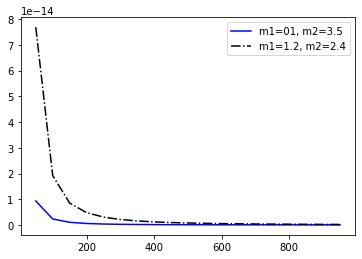

In [10]:
import matplotlib.pyplot as plt
g1 = UniGravity(0.1, 3.5)
g2 = UniGravity(1.2, 2.4)

r = []
g1_list = []
g2_list = []
for i in range(50, 1000, 50):
    r.append(i)
    g1_list.append(g1.value(i))
    g2_list.append(g2.value(i))
plt.plot(r, g1_list, c='b', ls='-', 
         label="m1=01, m2=3.5")       # 蓝色实线
plt.plot(r, g2_list, c='k', ls='-.',  # 黑色点划线
         label="m1=1.2, m2=2.4")
plt.legend(loc='best')
plt.show()


## 6.2	类的通用格式
通用的模板

## 6.3	受保护的类属性

关于学生信息的类需要封装学生的名称、学号和各科成绩，并且还需要提供用于存入，提取和打印有关某为学生信息的方法。 定义此类的代码如下所示：

In [11]:
class Student():
    """
    学生类
    
    ...
    类属性
    _____
    class_name: string
        ‘Student’
    stu_count: int
        学生的总数
    
    实例属性
    ________
    no: int
        学号
    name: string
        姓名
    age: int
        年龄
    score: float
        成绩
    grage: int
        年级
        
    方法
    ____
    displayCount:
        输出当前学生总数
    set_score：
        修改某学生的分数
    print_socre：
        输出某学生的分数
    """
    # 类名称
    class_name = 'Student'
    # 学生总数
    stu_count = 0

    def __init__ (self, no, name, age, score, grade):
        self.no = no
        self.name = name
        self.age = age
        self.score = score
        self.grade = grade
        Student.stu_count += 1

    def displayCount(self):
        print("Total students %d" % (Student.stu_count))

    def set_score (self, score):
        self.score = score

    def print_socre(self):
        print("%s: %s" % (self.name, self.score))   


创建两个不同的Student 实例，并调用类的各种方法来输出信息

In [12]:
stu1 = Student(1, 'Richard', 10, 95.5, 5)
stu2 = Student(2, 'Sam', 13, 86, 7)
stu1.print_socre()
stu2.print_socre()
stu2.displayCount()    


Richard: 95.5
Sam: 86
Total students 2


如果某一位学生的成绩需要更改，可以像如下代码一样更改学生的属性：

In [13]:
stu1.score = 87
stu1.print_socre()


Richard: 87


在大型软件系统中，以这种方式直接操纵属性通常会导致出错。它被认为是一种不良的编程风格。因为这种操控方式有一个隐含的缺陷，请看如下代码：

In [14]:
stu1.name = 'Joe'
stu1.print_socre()


Joe: 87


将所有的属性都改为私有属性

In [15]:
class Student():
    # 类名称
    __class_name = 'Student'
    # 学生总数
    __stu_count = 0
    def __init__ (self, no, name, age, score, grade):
        self.__no = no
        self.__name = name
        self.__age = age
        self.__score = score
        self.__grade = grade
        Student.__stu_count += 1

    def displayCount(self):
        print("Total students %d" % (Student.__stu_count))
    
    def set_score(self, score):
        self.__score = score

    def get_score(self, score):
        return self.__score

    def print_socre(self):
        print("%s: %s" % (self.__name, self.__score))

stu1 = Student(1, 'Richard', 10, 95.5, 5)
print(stu1.__socre)


AttributeError: 'Student' object has no attribute '__socre'

虽然直接访问私有属性会引发错误，但是下面的代码却可以正常执行：

In [16]:
stu1.__score = 97
print(stu1.__score)
stu1.print_socre()


97
Richard: 95.5


访问私有属性

In [17]:
stu2 = Student(2, 'Lily', 11, 99, 7)
stu2._Student__score


99

## 6.4	对象属性和类属性

访问类属性

In [18]:
print(stu1._Student__class_name)
print(stu2._Student__class_name)
stu1.displayCount()
stu2.displayCount()         


Student
Student
Total students 2
Total students 2


## 6.5	特殊方法


### 6.5.1	__call__
为UniGravity添加__call__方法

In [19]:
class UniGravity:
    def __init__(self, m1, m2):
        self.m1 = m1
        self.m2 = m2
        
    def __call__(self, r):
        return self.m1*self.m2*G/r**2

g1 = UniGravity(1.0, 3.2)
print(g1(1000))


2.1357759999999998e-16


In [20]:
from math import *

class Derivative2:
    """
    求二阶导数的类
    """
    def __init__(self, f, h=1E-6):
        self.f = f
        self.h = float(h)

    def __call__(self, x):
        f, h = self.f, self.h      # 代码简洁一些
        r = (f(x-h) - 2*f(x) + f(x+h))/float(h*h)
        return r

def f(x):
    return x**2 - 1

d2f = Derivative2(f)
d2sin = Derivative2(sin)
print(d2f(1.5))       # 自定义函数在1.5处的二阶导数
print(d2sin(pi))      # sin()在pi的二阶导数
print(d2sin(pi/2))    # sin()在pi/2的二阶导数


1.999733711954832
0.0
-1.000088900582341


### 6.5.2	__del__
析构函数

In [21]:
class Derivative2:
    """
    求二阶导数的类
    """

    def __init__(self, f, h=1E-6):
        pass
        
    def __del__(self):
        print("Delete an instance of class Derivative2")

df = Derivative2(f)
del df



Delete an instance of class Derivative2


### 6.5.3	__str__
__str__方法

In [22]:
class UniGravity:
    def __init__(self, m1, m2):
        self.m1 = m1
        self.m2 = m2

    def __call__(self, r):
        return self.m1*self.m2*G/r**2

    def __str__(self): 
        return 'm1 * m2 * G / r * r; '\
               'm1 = %g; m2 = %g' % (self.m1, self.m2)         

g=UniGravity(1.2, 35)
print(g(100))
print(g)

2.803206e-13
m1 * m2 * G / r * r; m1 = 1.2; m2 = 35


### 6.5.4	__repr__

In [23]:
class UniGravity:
    def __init__(self, m1, m2):
        self.m1 = m1
        self.m2 = m2

    def __call__(self, r):
        return self.m1*self.m2*G/r**2

    def __str__(self):
        return 'm1 * m2 * G / r * r; '\
               'm1 = %g; m2 = %g' % (self.m1, self.m2)

    def __repr__(self):
        return 'UniGravity(%f, %f)' % (self.m1, self.m2)

g1 = UniGravity(1.2, 35)
g = repr(g1)
g2 = eval(g)
print(g)
print(g2)         


UniGravity(1.200000, 35.000000)
m1 * m2 * G / r * r; m1 = 1.2; m2 = 35


### 6.5.5	__abs__

In [24]:
class Vector:
    def __init__(self, x_comp, y_comp):
        self.x_comp = x_comp
        self.y_comp = y_comp

    def __abs__(self):
        return (self.x_comp ** 2 + self.y_comp ** 2) ** 0.5

vector = Vector(3, 4)
abs(vector)


5.0

## Python的类和静态方法


In [25]:
class MyClass:
    def method(self):
        return 'instance method called', self

    @classmethod
    def classmethod(cls):
        return 'class method called', cls

    @staticmethod
    def staticmethod():
        return 'static method called'


下面代码调用一个实例方法：

In [26]:
obj = MyClass()
obj.method()

('instance method called', <__main__.MyClass at 0x1378d062fd0>)

接下来的代码是类方法：

In [27]:
obj.classmethod()

('class method called', __main__.MyClass)

    
接下来代码是静态方法：
    

In [28]:
obj.staticmethod()

'static method called'

在类本身上调用这些方法时会发生什么：

In [29]:
MyClass.classmethod()

('class method called', __main__.MyClass)

In [30]:
MyClass.staticmethod()


'static method called'

In [31]:
MyClass.method()

TypeError: method() missing 1 required positional argument: 'self'

以下代码是一个pizza类：


In [32]:
class Pizza:
    def __init__(self, ingredients):
        self.ingredients = ingredients

    def __repr__(self):
        return 'Pizza(%s})' % self.ingredients

In [33]:
p = Pizza(['cheese', 'tomatoes'])

In [34]:
p 

Pizza(['cheese', 'tomatoes']})

In [35]:
repr(p)

"Pizza(['cheese', 'tomatoes']})"

现实中披萨有许多美味的变化，以下代码定义了多种披萨：

In [36]:
Pizza(['mozzarella', 'tomatoes'])
Pizza(['mozzarella', 'tomatoes', 'ham', 'mushrooms'])
Pizza(['mozzarella'] * 4)

Pizza(['mozzarella', 'mozzarella', 'mozzarella', 'mozzarella']})

将类方法作为工厂函数，用于创建不同种类的披萨。代码如下：

In [37]:
class Pizza:
    def __init__(self, ingredients):
        self.ingredients = ingredients

    def __repr__(self):
        return f'Pizza({self.ingredients!r})'

    @classmethod
    def margherita(cls):
        return cls(['mozzarella', 'tomatoes'])

    @classmethod
    def prosciutto(cls):
        return cls(['mozzarella', 'tomatoes', 'ham'])


以下代码使用这些工厂函数创建新的对象：

In [38]:
Pizza.margherita(), Pizza.prosciutto()


(Pizza(['mozzarella', 'tomatoes']), Pizza(['mozzarella', 'tomatoes', 'ham']))



接下来的代码新增了静态方法：

In [39]:
import math

class Pizza:
    def __init__(self, radius, ingredients):
        self.radius = radius
        self.ingredients = ingredients

    def __repr__(self):
        return (f'Pizza({self.radius!r}, '
                f'{self.ingredients!r})')

    def area(self):
        return self.circle_area(self.radius)

    @staticmethod
    def circle_area(r):
        return r ** 2 * math.pi
p = Pizza(4, ['mozzarella', 'tomatoes'])
p.area()

50.26548245743669

In [40]:
Pizza.circle_area(4)

50.26548245743669

##	如何知道类的内容



In [41]:
class A:
    """
    一个类的例子
    """
    def __init__(self, value):
        self.v = value


In [42]:
a = A(2)
dir(a)


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'v']

In [43]:
print(a.__doc__)
print(a.__module__)
print(a.__dict__)



    一个类的例子
    
__main__
{'v': 2}


In [44]:
a = A([1,2])
print(a.__dict__)
a.myvar = 10
print(a.__dict__)


{'v': [1, 2]}
{'v': [1, 2], 'myvar': 10}


## 6.8	类的测试函数

In [45]:
def test_Derivative2():
    # 以下是一个二次函数的公式，其二阶导数与h无关
    f = lambda x: a*x**2 + b
    a=3.5; b=8
    ddfdx = Derivative2(f, h=0.5)
    diff = abs(ddfdx(4.5) - a)
    assert diff < 1E-14, 'bug in class Derivative2, diff=%s' % diff


## 6.9	类层次结构和继承

In [46]:
class Teacher:
    """
    教师类
    
    ...
    属性
    ____
    name: string
        姓名
    age: int
        年龄
    gender: string
        性别
    salary: int
        薪资
    course: string
        所授课程
    
    方法
    ____
    tell:
        列出某位教师的属性
    teaching:
        某位教师姓名即所授课程
    """

    def __init__(self, name, age, gender, salary, course):
        self.name = name
        self.age = age
        self.gender = gender
        self.salary = salary
        self.course = course

    def __del__(self):
        print("[%s] is resigned" % self.__name)

    def tell(self):
        print('----%s----' % self.name)
        for k, v in self.__dict__.items():
            print(k, v)
        print('----end-----') 

    def teaching(self):
        print("Teacher [%s] is teaching [%s]" % (self.name, self.course))

In [47]:
class Student:
    """
    学生类
    
    ...
    属性
    ____
    name: string
        姓名
    age: int
        年龄
    gender: string
        性别
    tuition: int
        学费
    course: string
        所上课程
    credit: int
        修得学分
    
    方法
    ____
    tell:
        列出某位学生的属性
    teaching:
        某位学生姓名即所报课程
    """

    def __init__(self, name, age, gender, course, tuition):

        self.name = name
        self.age = age
        self.gender = gender
        self.course = course
        self.tuition = tuition
        self.credit = 0

    def __del__(self):
        print("[%s] graduated" % self.name)

    def tell(self):
        print('----%s----' % self.name)
        for k, v in self.__dict__.items():
            print(k, v)
        print('----end-----') 

    def get_credit(self, credit):
        print('student [%s] has just get [%s]' % (self.name, credit))
        self.credit +=credit

In [48]:
class SchoolMember:
    """
    学校成员类
    
    ...
    属性
    ____
    name: string
        姓名
    age: int
        年龄
    gender: string
        性别
    
    方法
    ____
    tell:
        列出该成员的属性
    
    """
    __member = 0

    def __init__(self, name, age, gender):
        self.name = name
        self.age = age
        self.gender  =  gender
        self.__enroll()

    def __del__(self):
        self.__delist()

    def __enroll(self):
        # 注册
        SchoolMember.__member += 1

    def __delist(self):
        # 注销
        SchoolMember.__member -= 1

    def tell(self):
        print('----%s----' % self.name)
        for k, v in self.__dict__.items():
            print(k, v)
        print('----end-----')

In [49]:
class Teacher(SchoolMember):
    """
    教师类
    
    ...
    属性
    ____
    salary: int
        薪资
    course: string
        所授课程
    
    方法
    ____
    teaching:
        某位教师姓名即所授课程
    """
    def __init__(self, name, age, gender, salary, course):
        super(Teacher, self).__init__(name, age, gender)
        self.salary = salary
        self.course = course
        print('A Teacher[%s] registered' % (self.name))

    def __del__(self):
        print('A Teacher[%s] deregistered' % (self.name))          
        super(Teacher, self).__del__()

    def teaching(self):
        print('Teacher [%s] is teaching [%s]' % (self.__name, self.__course))
 

In [50]:
class Student(SchoolMember):
    """
    学生类
    
    ...
    属性
    ____
    tuition: int
        学费
    course: string
        所上课程
    credit: int
        修得学分
    
    方法
    ____
    teaching:
        某位学生姓名即所报课程
    """

    def __init__(self, name, age, gender, course, tuition):
        super(Student, self).__init__(name, age, gender)
        self.course = course
        self.tuition = tuition
        self.credit = 0
        print('A Student[%s] registered' % (self.name))

    def __del__(self):
        print('A Student[%s] deregistered' % (self.name))
        super(Student, self).__del__()

    def get_credit(self, credit):
        print('Student [%s] has just get [%s]' % (self.name, credit))
        self.credit += credit

In [51]:
s1 = Student('Richard', 12, 'M', 'Math', 1200)
s1.tell()
del s1


A Student[Richard] registered
----Richard----
name Richard
age 12
gender M
course Math
tuition 1200
credit 0
----end-----
A Student[Richard] deregistered


In [52]:
t1 = Teacher('Sam', 36, 'M', 'Math', 12000)
t1.tell()
del t1

A Teacher[Sam] registered
----Sam----
name Sam
age 36
gender M
salary Math
course 12000
----end-----
A Teacher[Sam] deregistered


### 多重继承

In [53]:
class Rectangle:
    """
    矩形（基类）
    
    ...
    属性
    ____
    length: float
        长
    width: float
        宽
        
    方法
    ____
    area:
        求面积
    perimeter:
        求周长
    """
    def __init__(self, length, width):
        self.length = length
        self.width = width

    def area(self):
        return self.length * self.width

    def perimeter(self):
        return 2 * self.length + 2 * self.width

class Square(Rectangle):
    """
    正方形（继承自矩形）
    """
    def __init__(self, length):
        super().__init__(length, length)


In [54]:
class Cube(Square):
    """
    立方体，继承自正方形
    
    ...
    
    方法
    ____
    surface_area:
        求表面积，每个面面积的6倍
    volume：
        求体积，一个面面积乘以边长
    """
    def surface_area(self):
        face_area = super().area()
        return face_area * 6

    def volume(self):
        face_area = super().area()
        return face_area * self.length 

cube = Cube(3)
cube.surface_area(), cube.volume()


(54, 27)

In [55]:
class Rectangle:
    def __init__(self, length, width):
        self.length = length
        self.width = width

    def area(self):
        return self.length * self.width

    def perimeter(self):
        return 2 * self.length + 2 * self.width

class Square(Rectangle):
    def __init__(self, length):
        # super()第一个入参是Square
        super(Square, self).__init__(length, length)


In [56]:
class Cube(Square):
    def surface_area(self):
        face_area = super(Square, self).area()
        return face_area * 6

    def volume(self):
        face_area = super(Square, self).area()
        return face_area * self.length


In [57]:
class Triangle:
    """
    三角形（基类）
    """
    def __init__(self, base, height):
        self.base = base
        self.height = height

    def area(self):
        return 0.5 * self.base * self.height

class RightPyramid(Triangle, Square):
    """
    金字塔，继承自三角形和正方形
    
    ...
    属性
    ————
    base： float
        底边长度
    slant_height：float
        斜高：侧面三角形底边上的高
    
    方法
    ___
    area():
        金字塔的表面积（包括底部的正方形）
    """
    def __init__(self, base, slant_height):
        self.base = base
        self.slant_height = slant_height

    def area(self):
        base_area = super().area()
        perimeter = super().perimeter()
        return 0.5 * perimeter * self.slant_height + base_area


In [58]:
pyramid = RightPyramid(4, 5)

In [59]:
pyramid.area()

AttributeError: 'RightPyramid' object has no attribute 'height'

In [60]:
RightPyramid.__mro__

(__main__.RightPyramid,
 __main__.Triangle,
 __main__.Square,
 __main__.Rectangle,
 object)

In [61]:
class RightPyramid(Square, Triangle):
    """
    金字塔，继承自三角形和正方形
    调整签名，Square---》Triangle
    ...
    属性
    ————
    base： float
        底边长度
    slant_height：float
        斜高：侧面三角形底边上的高
    
    方法
    ___
    area():
        金字塔的表面积（包括底部的正方形）
    """
    def __init__(self, base, slant_height):
        self.base = base
        self.slant_height = slant_height
        super().__init__(self.base)

    def area(self):
        base_area = super().area()
        perimeter = super().perimeter()
        return 0.5 * perimeter * self.slant_height + base_area


In [62]:
pyramid = RightPyramid(4, 5)

In [63]:
RightPyramid.__mro__

(__main__.RightPyramid,
 __main__.Square,
 __main__.Rectangle,
 __main__.Triangle,
 object)

In [64]:
pyramid.area()

56.0

In [65]:
class Triangle:
    def __init__(self, base, height):
        self.base = base
        self.height = height
        super().__init__()

    def tri_area(self):
        return 0.5 * self.base * self.height
        
class RightPyramid(Square, Triangle):
    def __init__(self, base, slant_height):
        self.base = base
        self.slant_height = slant_height
        super().__init__(self.base)

    def area(self):
        base_area = super().area()
        perimeter = super().perimeter()
        return 0.5 * perimeter * self.slant_height + base_area

    def area_2(self):
        base_area = super().area()
        triangle_area = super().tri_area()
        return triangle_area * 4 + base_area


In [66]:
pyramid = RightPyramid(4, 5)

In [67]:
pyramid.area_2()

AttributeError: 'RightPyramid' object has no attribute 'height'

In [68]:
class Rectangle:
    def __init__(self, length, width, **kwargs):
        self.length = length
        self.width = width
        super().__init__(**kwargs)

    def area(self):
        return self.length * self.width

    def perimeter(self):
        return 2 * self.length + 2 * self.width

class Square(Rectangle):
    def __init__(self, length, **kwargs):
        super().__init__(length=length, width=length, **kwargs)

class Cube(Square):
    def surface_area(self):
        face_area = super().area()
        return face_area * 6

    def volume(self):
        face_area = super().area()
        return face_area * self.length

class Triangle:
    def __init__(self, base, height, **kwargs):
        self.base = base
        self.height = height
        super().__init__(**kwargs)

    def tri_area(self):
        return 0.5 * self.base * self.height

class RightPyramid(Square, Triangle):
    def __init__(self, base, slant_height, **kwargs):
        self.base = base
        self.slant_height = slant_height
        kwargs["height"] = slant_height
        kwargs["length"] = base
        super().__init__(base=base, **kwargs)

    def area(self):
        base_area = super().area()
        perimeter = super().perimeter()
        return 0.5 * perimeter * self.slant_height + base_area

    def area_2(self):
        base_area = super().area()
        triangle_area = super().tri_area()
        return triangle_area * 4 + base_area


In [69]:
RightPyramid.__mro__

(__main__.RightPyramid,
 __main__.Square,
 __main__.Rectangle,
 __main__.Triangle,
 object)

In [70]:
pyramid = RightPyramid(4, 5)

In [71]:
pyramid.area(), pyramid.area_2()

(56.0, 56.0)

## 6.10	使用OOP方法的实例：

### 6.10.1	扑克牌

In [72]:
class Card:
    """
    一张扑克牌
    
    ...
    属性
    ____
    rank: string
        牌的大小
    suit: string
        牌的花色
    order: int
        一张牌在牌堆的顺序
    is_dace_up: bool
        牌面是否向上
    
    方法
    ____
    pic_order:
        返回牌在牌堆中的序号
    """
    RANKS = ('A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K')
    SUITS = ('梅花', '方片', '红桃', '黑桃')

    def __init__(self, rank, suit, face_up=True):
        self.rank = rank              # 牌面数字1~13
        self.suit = suit              # 花色
        self.order = self.pic_order()
        self.is_face_up = face_up     # 是否显示牌的正面，True为正面，False为反面

    def __str__(self):
        """ 打印一张牌的信息 """
        if self.is_face_up:
            rep = self.suit + self.rank
        else:
            rep = 'XX'
        return rep

    def pic_order(self):
        """ 牌的顺序号 """
        if self.rank == 'A':
            face_num = 1
        elif self.rank == 'J':
            face_num = 11
        elif self.rank == 'Q':
            face_num = 12
        elif self.rank == 'K':
            face_num = 13
        else:
            face_num = int(self.rank)
        if self.suit == '梅花':
            suit = 1
        elif self.suit == '方片':
            suit = 2
        elif self.suit == '红桃':
            suit = 3
        else:
            suit = 4
        return (suit - 1) * 13 + face_num

In [73]:
class Cards:
    """
    一些牌
    
    ...
    属性
    ____
    cards: list
        一副扑克牌
    
    方法
    ____
    shuffle:
        洗牌
    sort:
        理牌
    add:
        抓牌
    """

    def __init__(self):
        self.cards = []     # cards列表变量用来存储牌

    def __del__(self):
        del self.cards
        
    def __str__(self):
        """ 将所有的牌显示出来 """
        if self.cards:
            rep = ''
            for card in self.cards:
                rep += str(card) + '\t'
        else:
            rep = '无牌'
        return rep
        
    def shuffle(self):
        """ 洗牌 """
        import random
        random.shuffle(self.cards)
    
    def sort(self):
        """ 理牌 """
        self.cards.sort(key=Card.pic_order)
    
    def add(self, card):
        """ 抓牌 """
        self.cards.append(card)


In [74]:
class Hand(Cards):
    """ 玩家的一手牌 """

    def __init__(self):
        super(Hand, self).__init__()
        pass


In [75]:
class Poke(Cards):
    """
    Poke类代表一副52张的牌，继承Cards类。
    增加抓牌方法
    """

    def __init__(self):
        """ 生成一副牌 """
        super(Poke, self).__init__()
        for suit in Card.SUITS:
            for rank in Card.RANKS:
                self.add(Card(rank, suit))
     
    def get(self):
        """ 抓牌 """
        if (len(self.cards)):
            return self.cards.pop()
        else:
            print("牌发完了")
            return None


In [76]:
import math

players = [Hand(), Hand(), Hand(), Hand(), Hand()]
poke = Poke()   # 生成一副牌
poke.shuffle()  # 洗牌
per_hand = math.ceil(52 / len(players))

"""
抓牌
每轮每个玩家依次抓一张
"""
for round in range(per_hand):
    for hand in players:
        card = poke.get();
        if (card != None):
            hand.add(card)
        else:
            break

n = 1
for hand in players:
    print('牌手', n, end=':')
    hand.sort()
    print(hand)
    n = n + 1


牌发完了
牌手 1:梅花4	梅花5	方片7	方片8	方片9	方片J	方片Q	红桃3	红桃7	红桃J	黑桃7	
牌手 1:梅花A	梅花7	梅花J	方片3	红桃A	红桃8	红桃9	红桃K	黑桃2	黑桃6	黑桃9	
牌手 1:梅花8	梅花9	梅花Q	方片A	方片4	方片5	方片K	红桃4	红桃6	黑桃A	
牌手 1:梅花2	梅花3	梅花10	梅花K	方片2	方片10	黑桃3	黑桃4	黑桃10	黑桃J	
牌手 1:梅花6	方片6	红桃2	红桃5	红桃10	红桃Q	黑桃5	黑桃8	黑桃Q	黑桃K	


### 6.10.2	螺线

In [77]:
import math
import matplotlib.pyplot as plt

class Spiral:
    """
    螺线
    
    ...
    属性
    ____
    theta: float
        弧度
    radii: float
        极径
        
    方法
    ____
    draw:
        绘制螺线
    """
    
    def __init__(self):
        self.theta = []
        self.radii = []
        
    def draw(self):
        # 创建极坐标
        ax = plt.axes([0.025, 0.025, 0.95, 0.95], polar=True)
        plt.plot(self.theta, self.radii)
        
        # 将默认的角度转换为弧度制
        plt.thetagrids([0, 45, 90, 135, 180, 225, 270, 315], ['0', 'π/4', 'π/2', '3π/4', 'π', '5π/4', '3π/2', '7π/4'])
        plt.show()


In [78]:
class Archimedes(Spiral):
    """ 阿基米德螺线 """
    
    def __init__(self, a, b):
        super(Archimedes, self).__init__()
        self.a = a
        self.b = b
        self.f()
        
    def f(self):
        """
        使用以下方程求轴长和转角
        r = aθ + b (a≠0)
        """
        N = 200
        i = 0
        while (i < N):
            t = i * 4 * math.pi / N
            self.theta.append(t)
            self.radii.append(self.a + self.b*t)
            i += 1


In [79]:
class Log(Spiral):
    """ 对数螺线 """
    
    def __init__(self, a, b):
        super(Log, self).__init__()
        self.a = a
        self.b = b
        self.f()
        
    def f(self):        
        """
        使用以下方程求轴长和转角
        r = ae^(bθ)
        """
        N = 800
        i = 0
        while (i < N):
            t = i * 10 * math.pi / N
            self.theta.append(t)
            self.radii.append(self.a * (math.e ** (self.b*t)))
            i += 1

class Hyperbolic(Spiral):
    """ 双曲螺线 """
    
    def __init__(self, a):
        super(Hyperbolic, self).__init__()
        self.a = a
        self.f()
    
    def f(self): 
        """
        使用以下方程求轴长和转角
        r = a/θ
        """
        N = 50
        i = 1
        while (i < N):
            t = i *  math.pi / 10
            self.theta.append(t)
            self.radii.append(self.a /t)
            i += 1

class Fermat(Spiral):
    """ 费马螺线 """
    
    def __init__(self, a):
        super(Fermat, self).__init__()
        self.a = a
        self.f()
    
    def f(self): 
        """
        使用以下方程求轴长和转角
        r = asqrt(θ)
        """
        N = 500
        i = 0
        
        while (i < N):
            t = i *  math.pi / 50
            self.theta.append(t)
            self.radii.append(self.a * math.sqrt(t))
            i += 1


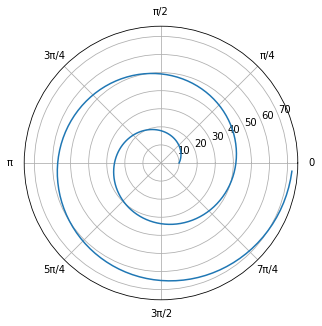

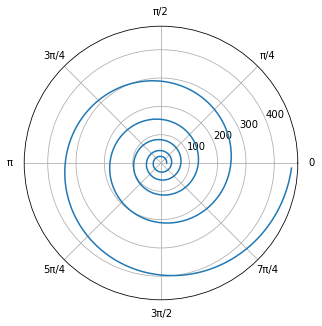

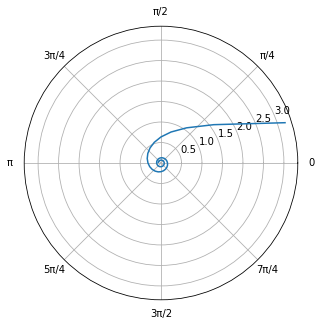

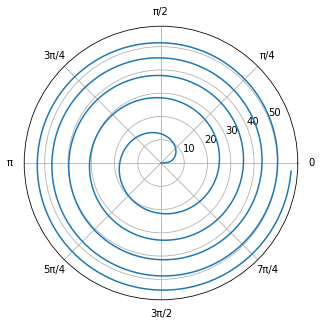

In [80]:
a = Archimedes(10, 5)
a.draw()
l = Log(20, 0.1)
l.draw()
h = Hyperbolic(1)
h.draw()
f = Fermat(10)
f.draw()



### 6.10.3	比例数

In [81]:
import numbers
import math

class FixedPoint( numbers.Rational ):
    __slots__ = ( "value", "scale", "default_format" )
    def __new__(self, value, scale=100 ):
        self = super(FixedPoint, self).__new__(self)
        if isinstance(value,FixedPoint):
            self.value= value.value
            self.scale= value.scale
        elif isinstance(value,int):
            self.value= value
            self.scale= scale
        elif isinstance(value,float):
            self.value= int(scale*value+.5)
            self.scale= 1
        else:
            raise TypeError
        digits= int(math.log10(scale))
        self.default_format= "{{0:.{digits}f}}".format(digits=digits)
        return self
    
    def __str__(self):
        return self.__format__( self.default_format )
    
    def __repr__(self):
        return "%s(%d, scale=%d)" % (self.__class__.__name__, 
                                     self.value, self.scale )
        
    def __format__( self, specification ):
        if specification == "": 
            specification = self.default_format
        return specification.format( self.value/self.scale )
            
    def numerator(self):
        return self.value
    
    def denominator(self):
        return self.scale


In [87]:
class FixedPoint():
    __slots__ = ( "value", "scale", "default_format" )

def method(self):
    print("Test method")

f = FixedPoint()
f.value = 99              # 动态添加属性
f.default_format = method # 动态添加方法
f.default_format(f)
f.new_attribute = method  # 不在slot元组中，将引发异常


Test method


AttributeError: 'FixedPoint' object has no attribute 'new_attribute'

In [90]:
class FixedPoint( numbers.Rational ):
    __slots__ = ( "value", "scale", "default_format" )
    
    def __new__(self, value, scale=100 ):
        self = super(FixedPoint, self).__new__(self)
        if isinstance(value,FixedPoint):
            self.value= value.value
            self.scale= value.scale
        elif isinstance(value,int):
            self.value= value
            self.scale= scale
        elif isinstance(value,float):
            self.value= int(scale*value+.5)
            self.scale= 1
        else:
            raise TypeError
        digits= int(math.log10(scale))
        self.default_format= "{{0:.{digits}f}}".format(digits=digits)
        return self
    
    def __str__(self):
        return self.__format__( self.default_format )
    
    def __repr__(self):
        return "%s(%d, scale=%d)" % (self.__class__.__name__, 
                                     self.value, self.scale )
        
    def __format__( self, specification ):
        if specification == "": 
            specification = self.default_format
        return specification.format( self.value/self.scale )
            
    def numerator(self):
        return self.value
    
    def denominator(self):
        return self.scale
    
    def __add__( self, other ):
        """ 前向加法 """
        if not isinstance(other,FixedPoint):
            new_scale= self.scale
            new_value= self.value + other*self.scale
        else:
            new_scale= max(self.scale, other.scale)
            new_value= (self.value*(new_scale//self.scale)
                        + other.value*(new_scale//other.scale))
        return FixedPoint( int(new_value), scale=new_scale )
    
    def __sub__( self, other ):
        """ 前向减法 """
        if not isinstance(other,FixedPoint):
            new_scale= self.scale
            new_value= self.value - other*self.scale
        else:
            new_scale= max(self.scale, other.scale)
            new_value= (self.value*(new_scale//self.scale)
                        - other.value*(new_scale//other.scale))
        return FixedPoint( int(new_value), scale=new_scale )
    
    def __mul__( self, other ):
        """ 前向乘法 """
        if not isinstance(other,FixedPoint):
            new_scale= self.scale
            new_value= self.value * other
        else:
            new_scale= self.scale * other.scale
            new_value= self.value * other.value
        return FixedPoint( int(new_value), scale=new_scale )
    
    def __truediv__( self, other ):
        """ 前向除法 """
        if not isinstance(other,FixedPoint):
            new_value= int(self.value / other)
        else:
            new_value= int(self.value / (other.value/other.scale))
        return FixedPoint( new_value, scale=self.scale )
    
    def __floordiv__( self, other ):
        """ 前向地板除法 """
        if not isinstance(other,FixedPoint):
            new_value= int(self.value // other)
        else:
            new_value= int(self.value // (other.value/other.scale))
        return FixedPoint( new_value, scale=self.scale )
    
    def __mod__( self, other ):        
        """ 前向取模 """
        if not isinstance(other,FixedPoint):
            new_value= (self.value/self.scale) % other
        else:
            new_value= self.value % (other.value/other.scale)
        return FixedPoint( new_value, scale=self.scale )
    
    def __pow__( self, other ):
        """ 前向幂 """
        if not isinstance(other,FixedPoint):
            new_value= (self.value/self.scale) ** other
        else:
            new_value= (self.value/self.scale) ** (other.value/other.scale)
        return FixedPoint( int(new_value)*self.scale, scale=self.scale )

    
    def __abs__( self ):
        return FixedPoint( abs(self.value), self.scale )
    
    def __float__( self ):
        return self.value/self.scale
    
    def __int__( self ):
        return int(self.value/self.scale)
    
    def __trunc__( self ):
        return FixedPoint( math.trunc(self.value/self.scale), self.scale )
    
    def __ceil__( self ):
        return FixedPoint( math.ceil(self.value/self.scale), self.scale )
    
    def __floor__( self ):
        return FixedPoint( math.floor(self.value/self.scale), self.scale )
    
    def __round__( self, ndigits ):
        return FixedPoint( round(self.value/self.scale, ndigits=0), self.scale )
    
    def __neg__( self ):
        return FixedPoint( -self.value, self.scale )
    
    def __pos__( self ):
        return self

    
    def __radd__( self, other ):
        if not isinstance(other,FixedPoint):
            new_scale= self.scale
            new_value= other*self.scale + self.value
        else:
            new_scale= max(self.scale, other.scale)
            new_value= (other.value*(new_scale//other.scale)
                        + self.value*(new_scale//self.scale))
        return FixedPoint( int(new_value), scale=new_scale )
    
    def __rsub__( self, other ):
        if not isinstance(other,FixedPoint):
            new_scale= self.scale
            new_value= other*self.scale - self.value
        else:
            new_scale= max(self.scale, other.scale)
            new_value= (other.value*(new_scale//other.scale)
                        - self.value*(new_scale//self.scale))
        return FixedPoint( int(new_value), scale=new_scale )
    
    def __rmul__( self, other ):
        if not isinstance(other,FixedPoint):
            new_scale= self.scale
            new_value= other*self.value
        else:
            new_scale= self.scale*other.scale
            new_value= other.value*self.value
        return FixedPoint( int(new_value), scale=new_scale )
    
    def __rtruediv__( self, other ):
        if not isinstance(other,FixedPoint):
            new_value= self.scale*int(other / (self.value/self.scale))
        else:
            new_value= int((other.value/other.scale) / self.value)
        return FixedPoint( new_value, scale=self.scale )
    
    def __rfloordiv__( self, other ):
        if not isinstance(other,FixedPoint):
            new_value= self.scale*int(other // (self.value/self.scale))
        else:
            new_value= int((other.value/other.scale) // self.value)
        return FixedPoint( new_value, scale=self.scale )
    
    def __rmod__( self, other ):
        if not isinstance(other,FixedPoint):
            new_value= other % (self.value/self.scale)
        else:
            new_value= (other.value/other.scale) % (self.value/self.scale)
        return FixedPoint( new_value, scale=self.scale )
    
    def __rpow__( self, other ):
        if not isinstance(other,FixedPoint):
            new_value= other ** (self.value/self.scale)
        else:
            new_value= (other.value/other.scale) ** self.value/self.scale
        return FixedPoint( int(new_value)*self.scale, scale=self.scale )
    
    def __eq__( self, other ):
        if isinstance(other, FixedPoint):
            if self.scale == other.scale:
                return self.value == other.value
            else:
                return self.value*other.scale//self.scale == other.value
        else:
            return abs(self.value/self.scale - float(other)) < .5/self.scale
        
    def __ne__( self, other ):
        return not (self == other)
    
    def __le__( self, other ):
        return self.value/self.scale <= float(other)
    
    def __lt__( self, other ):
        return self.value/self.scale <  float(other)
    
    def __ge__( self, other ):
        return self.value/self.scale >= float(other)
    
    def __gt__( self, other ):
        return self.value/self.scale >  float(other)


In [91]:
f1 = FixedPoint(12.3, 10)
f2 = FixedPoint(13, 10)
print(f1, f2)
print(f1+f2)
print(repr(f1))



123.0 1.3
124.3
FixedPoint(123, scale=1)


## 6.12	练习



In [48]:
# 练习1

class Eqint:
    def __init__(self, sequence):
        self.__s = []
        self.__length = 0
        for i in sequence:
            self.__s.append(int(i))
            self.__length += 1
    
    def __str__(self):
        return (str(self.__length))
    
    def __eq__(self, other):
        if self.__length != other.__length:
            return False
        else:
            return True
        
q1 = Eqint((1,2,3,4))
q2 = Eqint([1,2,3,4])
q1()

TypeError: 'Eqint' object is not callable

In [56]:
zero = Eqint([])
one_list = Eqint([1])
one_tuple = Eqint((1,))
one_string = Eqint('1')
zero == one_list, one_tuple == one_list,one_tuple == one_string

(False, True, True)

In [74]:
# 练习3

class Eqint:
    def __init__(self, sequence):
        self.__s = []
        self.__length = 0
        for i in sequence:
            self.__s.append(i)
            self.__length += 1
    
    def __str__(self):
        return (str(self.__length))
    
    def __repr__(self):
        return str(self.__length)
    
    def __eq__(self, other):
        if self.__length != other.__length:
            return False
        else:
            return True
        
    def __add__(self, other):
        return Eqint(self.__s + other.__s)
    
    

one_list = Eqint([1])
one_tuple = Eqint((1,))
print(one_list + one_tuple)

2


In [82]:
# 练习4

positive_integers = []
i = 0
while i < 10:
    eqn = Eqint(positive_integers)
    positive_integers.append(eqn)
    i += 1
positive_integers

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [80]:
positive_integers

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]